<a href="https://colab.research.google.com/github/ECV21/data-science-portafolio/blob/main/El_proyecto_%22Titanic's_Sinking%22_en_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Titanic

# Titanic - Machine Learning from Disaster

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.


###The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, **we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?”** using passenger data (ie name, age, gender, socio-economic class, etc).

https://www.kaggle.com/competitions/titanic/overview

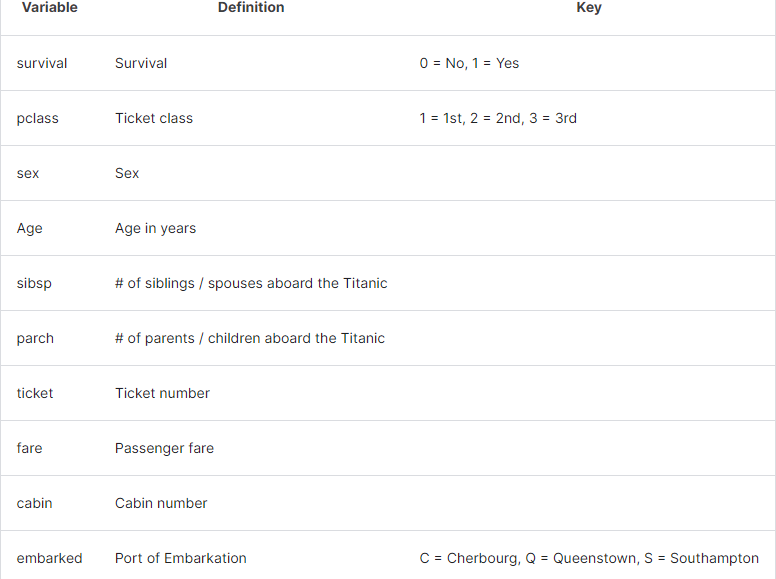

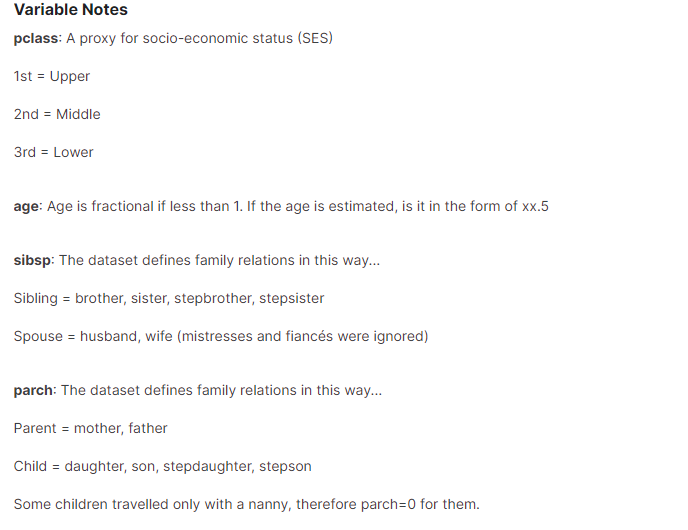

#Carga de librerias


In [ ]:
#Manipulación de dataset
import pandas as pd
import numpy as np

#visualización del dataset
import matplotlib.pyplot as plt
import seaborn as sns

#Para darle estilo a las visualizaciones
sns.set()

#ibrería para procesar data
from sklearn.preprocessing import LabelEncoder

#Models
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

#Model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.7 MB/s eta 0:00:00


#Carga de data

In [ ]:
original_data=pd.read_csv('train.csv')
original_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Exploración de datos

In [ ]:
#Exploration Data analysis
original_data.describe() #numbers
#original_data.describe(include='all') #category and numbers

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Datos nulls
original_data.isnull().sum() #ver datos nulls


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Tipo de datos
original_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#Data cleaning

In [ ]:
#Eliminar columnas con alto número de nulls
data = original_data.drop(['Cabin'], axis=1)
data.isnull().sum() #comprobamos que ya no está la columna eliminada

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
#Acompletar columna númerica que tiene pocos nulls


# La columna AGE sería un buen indicador, hay 177 null, acompletarlo con un promedio/mediana
data['Age']=data['Age'].fillna(data['Age'].mean())
#data['Age'] = data['Age'].fillna(data['Age'].median()) #o acompletar con mediana


In [ ]:
#Acompletar columna categórica que tiene pocos nulls


#para la columna Embarked, hay dos null, acompletar la data con la moda
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [ ]:
#comprobamos que ya no hay nulls

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Text(0.5, 1.0, 'Passenger fare')

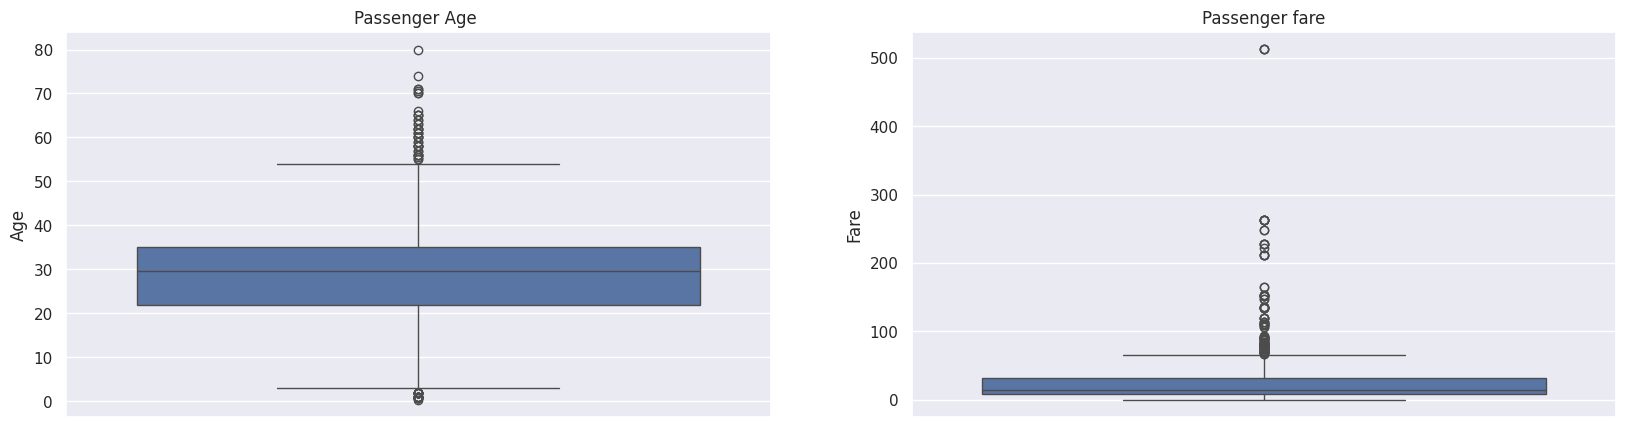

In [ ]:
#Boxplot de AGE and fare
f, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,5))
sns.boxplot(data['Age'],ax= ax1).set_title('Passenger Age ')
sns.boxplot(data['Fare'],ax=ax2).set_title('Passenger fare')

'el number of sibligns básicamente se concetra en 1; el Embarked se centra en el S\n para Parch los valores se centra en 0 padres'

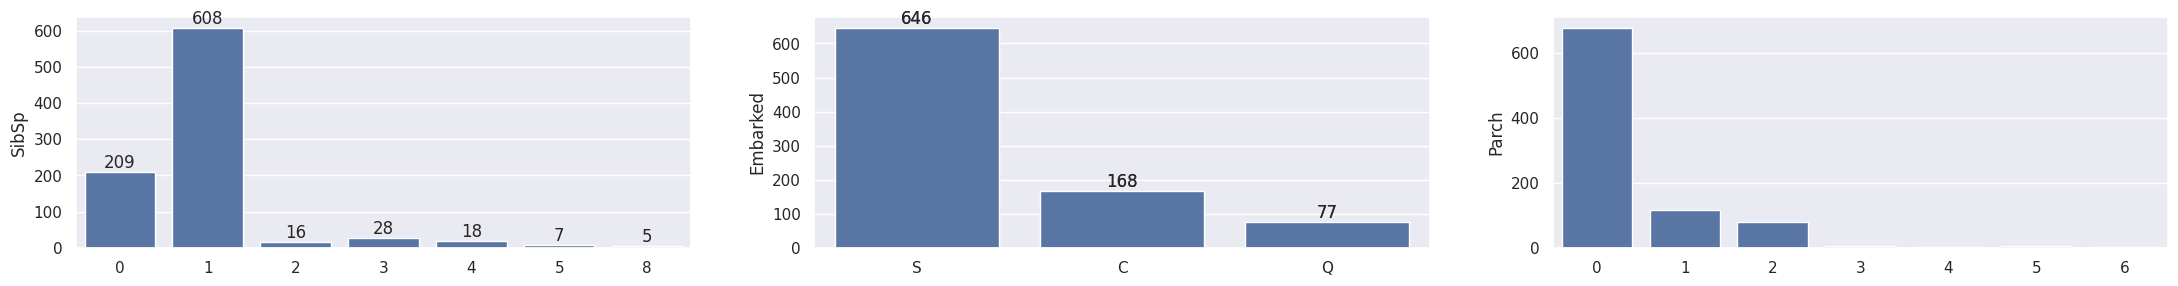

In [ ]:
#Barplot de sibsp(num de familiares), Enbarked (port or embarkation) y Parch(num parents of children)
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(27,3))
sns.barplot(x=data['SibSp'].unique(),y=data['SibSp'].value_counts(),ax=ax1)
ax1.bar_label(ax1.containers[0])
sns.barplot(x=data['Embarked'].unique(),y=data['Embarked'].value_counts(),ax=ax2)
ax2.bar_label(ax2.containers[0])
sns.barplot(x=data['Parch'].unique(),y=data['Parch'].value_counts(),ax=ax3)
ax2.bar_label(ax2.containers[0])
"""el number of sibligns básicamente se concetra en 1; el Embarked se centra en el S
 para Parch los valores se centra en 0 padres"""

' Survived se concentra en 0, la mayoría no sobrevivió; Pclass se centra en 3, \nla tercer clase; y en Sex, hay más male, hombres que mujeres '

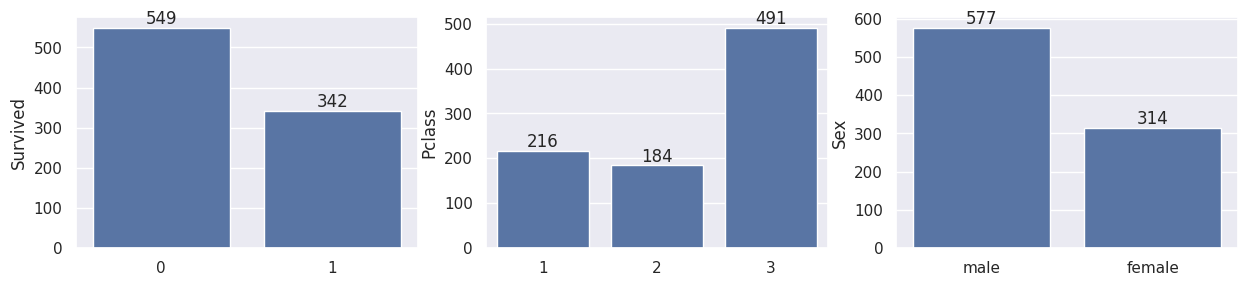

In [ ]:
#graficar columuns: Survived, Pclass and sex:
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,3))
sns.barplot(x=data['Survived'].unique(),y=data['Survived'].value_counts(),ax=ax1)
ax1.bar_label(ax1.containers[0])
sns.barplot(x=data['Pclass'].unique(),y=data['Pclass'].value_counts(),ax=ax2)
ax2.bar_label(ax2.containers[0])
sns.barplot(x=data['Sex'].unique(),y=data['Sex'].value_counts(),ax=ax3)
ax3.bar_label(ax3.containers[0])
""" Survived se concentra en 0, la mayoría no sobrevivió; Pclass se centra en 3,
la tercer clase; y en Sex, hay más male, hombres que mujeres """

<ipython-input-23-fb7db1ecf43e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,linewidths=1)


'Como se observa en el matrx, Pclass and fare tiene tiene la más alta correlacion\ncon la variable Survived (Target), los demás tiene correlación pero baja'

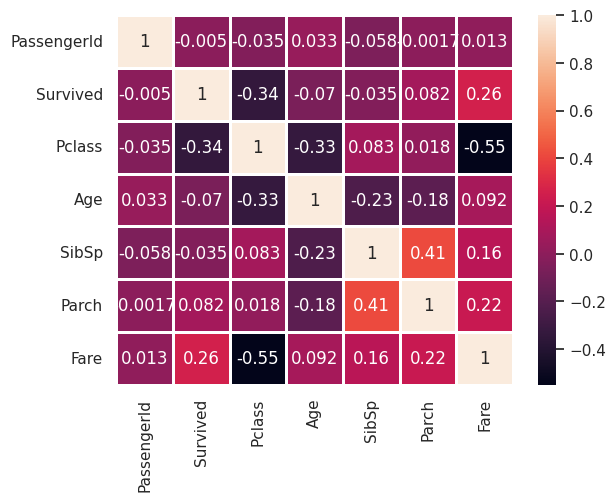

In [ ]:
#Ver la correlación que hay entre las variables, esto para selccionar varibales
# predictoras y vraibles target
sns.heatmap(data.corr(),annot=True,linewidths=1)
"""Como se observa en el matrx, Pclass and fare tiene tiene la más alta correlacion
con la variable Survived (Target), los demás tiene correlación pero baja"""

In [ ]:
#Eliminación de outliers AGE and FARE, nuestras variables explicativas
#calcular quartil, 25%, 50% = mediana and 75%; calcular rango intercuartil
q1 = np.percentile(data['Age'],25)
q3 = np.percentile(data['Age'],75)
iqr = q3 - q1

In [ ]:
#Eliminar variables por debajo y por aribla de rango intercualtil en AGE
data_clean = data[(data['Age'] < (q3+1.5*iqr)) & (data['Age'] > (q1-1.5*iqr))]
data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
#eliminar outliers en FARE
q1 = np.percentile(data['Fare'],25)
q3 = np.percentile(data['Fare'],75)
iqr = q3 - q1
#Eliminar variables por debajo y por aribla de rango intercualtil en AGE
data_clean = data[(data['Fare'] < (q3+1.5*iqr)) & (data['Fare'] > (q1-1.5*iqr))]
data_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q


Text(0.5, 1.0, 'Fare')

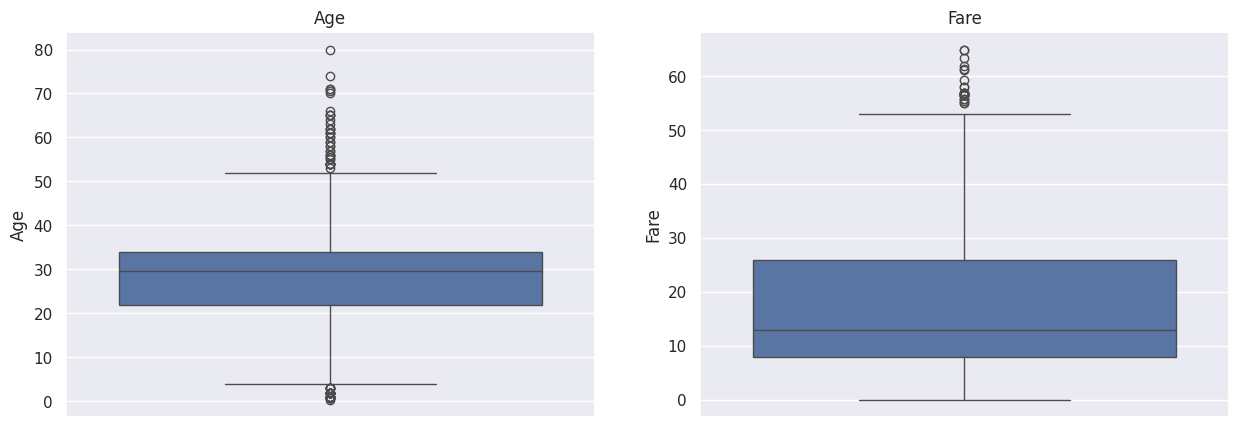

In [ ]:
#revisar que el BOXPLOT ya está mejor, no hay outliers en ambas variables
f, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15,5))
sns.boxplot(data_clean['Age'],ax= ax1).set_title('Age')
sns.boxplot(data_clean['Fare'],ax=ax2).set_title('Fare')

In [ ]:
#encoding gender, pasar male(1) and famale(0) números 0 y 1 para hacer modelo
encoder = LabelEncoder()
gender_encode = encoder.fit_transform(data_clean['Sex'])
data_clean['gender_encode'] = gender_encode
data_clean.head()

<ipython-input-28-75b87551d9eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['gender_encode'] = gender_encode


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,gender_encode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,1


In [ ]:
#to drop columns que no utilizaremos, elimar todas ecepto: Age and gender_encode
data_clean = data_clean.drop(['PassengerId','Name','Ticket','Sex'],axis=1)
data_clean

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,gender_encode
0,0,3,22.000000,1,0,7.2500,S,1
2,1,3,26.000000,0,0,7.9250,S,0
3,1,1,35.000000,1,0,53.1000,S,0
4,0,3,35.000000,0,0,8.0500,S,1
5,0,3,29.699118,0,0,8.4583,Q,1
...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,S,1
887,1,1,19.000000,0,0,30.0000,S,0
888,0,3,29.699118,1,2,23.4500,S,0
889,1,1,26.000000,0,0,30.0000,C,1


In [ ]:
#obtener dummies para las demás variables:
data_with_dummies = pd.get_dummies(data_clean,drop_first=True)
data_with_dummies.head()
data_with_dummies.info()
"""It set the option drop_first = True, because it reduce the multicollinearity.
 If Embarked_Q = 0 and Embarked_S = 0, it mean that the passenger had embarked in C."""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       775 non-null    int64  
 1   Pclass         775 non-null    int64  
 2   Age            775 non-null    float64
 3   SibSp          775 non-null    int64  
 4   Parch          775 non-null    int64  
 5   Fare           775 non-null    float64
 6   gender_encode  775 non-null    int64  
 7   Embarked_Q     775 non-null    uint8  
 8   Embarked_S     775 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 50.0 KB


'It set the option drop_first = True, because it reduce the multicollinearity.\n If Embarked_Q = 0 and Embarked_S = 0, it mean that the passenger had embarked in C.'

#Selección de modelo

In [ ]:
#crear X y Y para modelo:
inputs = data_with_dummies.drop('Survived',axis=1)
target = data_with_dummies['Survived']


In [ ]:
#dividir los datos en train and test:
train_X, test_X, train_y, test_y = train_test_split(inputs,target, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(inputs,target, test_size=0.25, random_state=0)

In [ ]:
#Modelos
#Random Forest
rfc=RandomForestClassifier()
rfc=rfc.fit(train_X,train_y)

#LightGBM
#boosting_type='gbdt',objective='binary',random_state=42
lgbm = LGBMClassifier()
lgbm.fit(train_X, train_y)

#XGBoost
xgbr = xgb.XGBClassifier()
xgbr.fit(train_X, train_y)

#SVC
#probability=True,random_state=42
svc = SVC(probability=True)
svc.fit(train_X, train_y)

#CatBoost
cboost = CatBoostClassifier()
cboost.fit(train_X, train_y)

[LightGBM] [Info] Number of positive: 196, number of negative: 385
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 581, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337349 -> initscore=-0.675129
[LightGBM] [Info] Start training from score -0.675129
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
#Predicciones del modelo con el test_x
svc.predict(test_X)
"""predict_proba es un método del objeto svc que se utiliza para predecir la
probabilidad de que una muestra pertenezca a cada una de las clases."""

#Predecir la probabilidad de que las muestras en test_X pertenezcana la segunda clase, 1
svc.predict_proba(test_X)[:,1] #probabilidad de que sea calse 1: SROBREVIVA
#svc.predict_proba(test_X)[:,0] #probabildia de que sea la clase 0: NO SOBREVIVA

array([0.38091698, 0.27972373, 0.66428209, 0.28518041, 0.28610756,
       0.28903062, 0.38150284, 0.31075736, 0.32207588, 0.61165053,
       0.36785384, 0.29159022, 0.60770365, 0.28076214, 0.28194599,
       0.27828759, 0.28641036, 0.70718054, 0.31587851, 0.27891565,
       0.28076214, 0.33416814, 0.2921465 , 0.51825032, 0.42160884,
       0.30404565, 0.31734118, 0.40455469, 0.31877235, 0.30634378,
       0.2717826 , 0.29751487, 0.54630573, 0.28608544, 0.64628046,
       0.279739  , 0.27972491, 0.3969223 , 0.70816357, 0.61868533,
       0.31200145, 0.29254496, 0.34460494, 0.28917042, 0.29191753,
       0.2800899 , 0.28039605, 0.37415207, 0.31305633, 0.29599331,
       0.30356213, 0.66624864, 0.27965648, 0.29763928, 0.29904175,
       0.29097018, 0.28917042, 0.283705  , 0.26982072, 0.29689335,
       0.28939663, 0.59649308, 0.43662853, 0.31585856, 0.29310488,
       0.30739414, 0.58487967, 0.30272466, 0.28906685, 0.70181186,
       0.3224491 , 0.31497239, 0.38039768, 0.68753143, 0.33495

#Validación del modelo

In [ ]:
classifiers = []
classifiers.append(svc)
classifiers.append(rfc)
classifiers.append(xgbr)
classifiers.append(lgbm)
classifiers.append(cboost)


In [ ]:
classifier_names = ['svc','rfc','xgbr','lgbm','cboost']

accuracy_list = []
auc_list=[]

for classifier in classifiers :
    y_pred=classifier.predict(test_X)
    y_pred_proba=classifier.predict_proba(test_X)[:,1]
    accuracy_list.append(round(accuracy_score(test_y, y_pred),2))
    auc_list.append(round(roc_auc_score(test_y, y_pred_proba),2))
auc_list

[0.77, 0.83, 0.83, 0.85, 0.82]

[Text(0, 0, '0.77'),
 Text(0, 0, '0.83'),
 Text(0, 0, '0.83'),
 Text(0, 0, '0.85'),
 Text(0, 0, '0.82')]

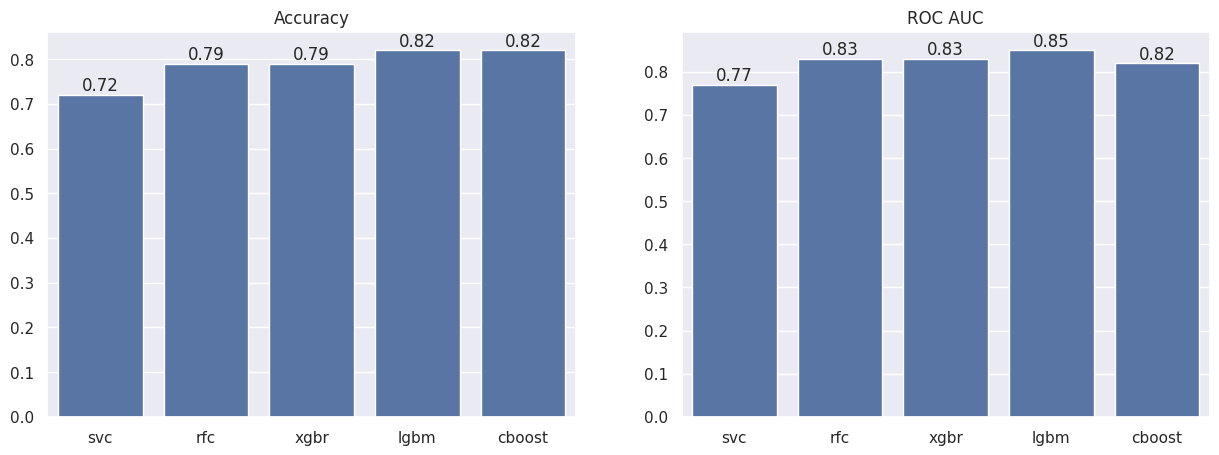

In [ ]:
#ver de manera gráfica el Accurancy y ROC AUC de los modelos
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=classifier_names,y=accuracy_list,ax=ax1).set_title('Accuracy')
ax1.bar_label(ax1.containers[0])
sns.barplot(x=classifier_names,y=auc_list,ax=ax2).set_title('ROC AUC')
ax2.bar_label(ax2.containers[0])

In [ ]:
###For this problem, the best model is cboost, tuvo el accuracy y roc auc más alto


#Ejercicio con modelo de regresión lineal: logistic

In [ ]:
train_df = pd.read_csv('train.csv')
train_df.head(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


##Exploración del dataset

In [ ]:
train_df.info()
#Tenemos 12 columnas, varios records nulls, ints

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# estadística descriptiva del dataset
#train_df.describe() #solo datos numéricos
train_df.describe(include='all') #incluye datos numéricos y NO numéricos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Con lo anterior podemos ver que la variable "Cabin" tiene el mayor número de NAN/null.


In [ ]:
#Eliminar variable anterior:
train_df=train_df.drop(['Cabin'], axis=1)
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [ ]:
#Acomplera datos faltantes en AGE, tenemos en total 891 PERSONAS; con AGE solo hay 714, rellenar el resto con la mediana.
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

In [ ]:
#Acompletar datos faltantes en columna Embarked, rellenar con la MODA de dicha columna/variable
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [ ]:
# Revisar que no hay datos faltantes(en AGE y EMBARKED) ni columnas inservibles
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


#Variables relevantes que nos puedan ayudar a determinas si un pasajero sobrevivirá o no al hundimiento del TITANIC

<Axes: xlabel='Survived,Sex'>

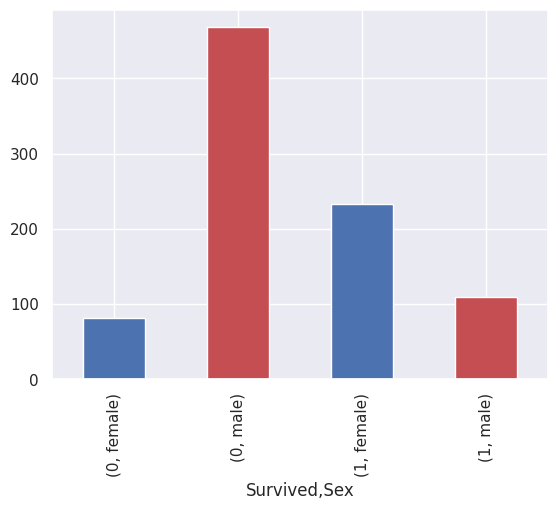

In [ ]:
#Variable GENERO, ver las personas que sobrevivieron de acuerdo a su género
train_df[['Survived', 'Sex']].value_counts(sort=False).plot(kind='bar', color=['b', 'r'])
#Red no sobrevive, Blue sí sobrevive

Se puede ver que sobrevivieron más mujeres (color azul) que hombres. La barra roja muestra el número de personas NO sobrevieron en ambos géneros, claramente la barra roja en hombres es mayor.

De lo anterior, podemos concluir que el genero podría pedecir si alguien sobrevive o no.

In [ ]:
#convertir variable anterior en 0 y 1, para no tener texto.
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
encoder_gender = label_encoder.fit_transform(train_df['Sex']) #crear columna que transforma columna SEX en 1 y 0

#creación de nueva columna del SEX pero en código: 1(hombre) y 0(mujer)
train_df['Encoder_sex']=encoder_gender

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Encoder_sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


# Matriz de correlación

Identifica qué variables númericas tiene relación con la variable "Survived"

<ipython-input-25-6da0c4283657>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = train_df.corr()


<Axes: >

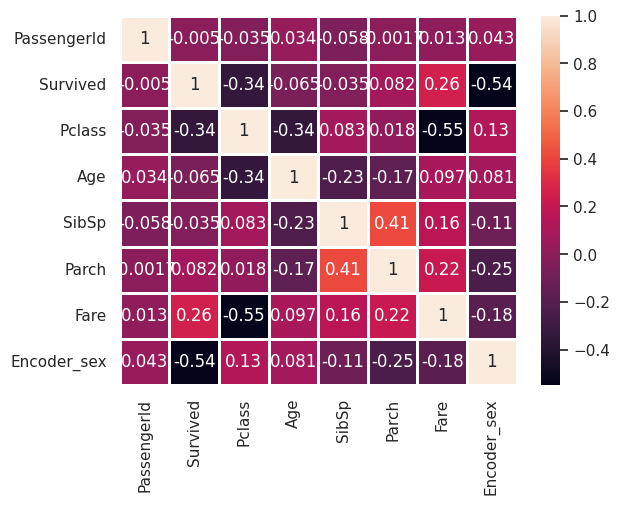

In [ ]:
#Crear matriz de correlación
correlation = train_df.corr()
sns.heatmap(correlation, annot=True, linewidths=1)

Las variables más cercanas a 1 indican una relación positiva(Si una sube la otra también), un número cercano a -1 indica que la relación directamente negativa(si una variable baja la otra variable sube); un número cercano a 0 indica que no hay relación alguna entre las varibales.

* Passengerid vs Survived, prácticamente no tienen relación alguna
* Pclass vs survived tiene una relación negativa de -0.34, más o menos alta
* Age vs survived tiene una relación negativa de -0.065; baja
* Fare vs survived tienen una relación positiva de 0.26
* SEX (Encoder_sex) vs survived tiene una relación negativa del -0.54, +/- alta

<Axes: xlabel='Survived,SibSp'>

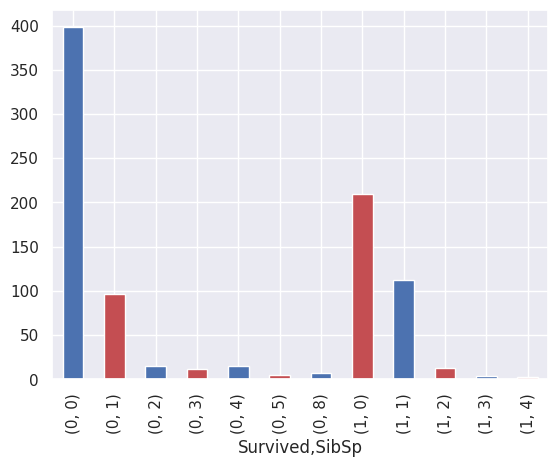

In [ ]:
#relación entre variable categórica:Survived vs SibSp

train_df[['Survived', 'SibSp']].value_counts(sort=False).plot(kind='bar', color=['b', 'r'])

El número de SibSP (Sibling = brother, sister, stepbrother, stepsister) sí influye en al sobrevivencia de la persona; más parientes tienes más podrías sobrevivir(BLUE)

<Axes: xlabel='Survived,Parch'>

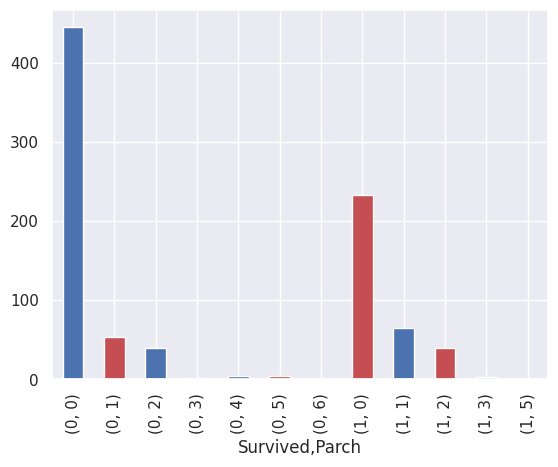

In [ ]:
#relación entre variable categórica: Survived vs Parch: The dataset defines family relations in this way Parent = mother, father
      #Child = daughter, son, stepdaughter, stepson

train_df[['Survived', 'Parch']].value_counts(sort=False).plot(kind='bar', color=['b', 'r'])

El número de padre/Parch influye si una persona puede subrevivir(AZUL) o no (RED)

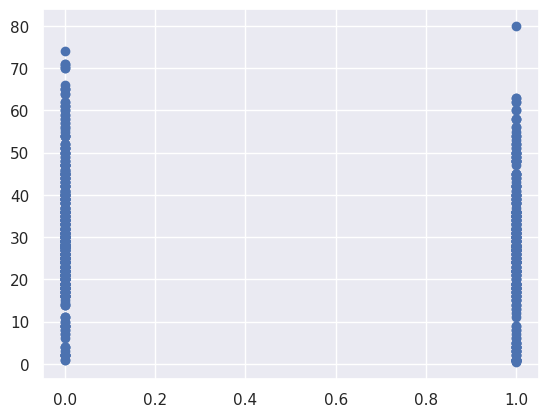

In [ ]:
#Relación de variable númerica: AGE vs Survived(1=sobrevive)

plt.scatter(train_df['Survived'], train_df['Age'])

LA vairbale AGE para que no influye en en si sobrevive o no.

In [ ]:
#variables que nos ayudaran a predecir si una persona sobrevive o no:

train_predictors = train_df.drop(['PassengerId','Name','Age','Ticket','Sex', 'Survived',
                                  'Ticket'],axis=1)
train_predictors.head()

,Pclass,SibSp,Parch,Fare,Embarked,Encoder_sex
0,3,1,0,7.2500,S,1
1,1,1,0,71.2833,C,0
2,3,0,0,7.9250,S,0
3,1,1,0,53.1000,S,0
4,3,0,0,8.0500,S,1


In [ ]:
#crear variable dummies para nuestras columnas categórica: Embarked
dummy_encoded = pd.get_dummies(train_predictors)
dummy_encoded.head()

,Pclass,SibSp,Parch,Fare,Encoder_sex,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.2500,1,0,0,1
1,1,1,0,71.2833,0,1,0,0
2,3,0,0,7.9250,0,0,0,1
3,1,1,0,53.1000,0,0,0,1
4,3,0,0,8.0500,1,0,0,1


In [ ]:
# Varible de salida/target o varibale a predecir
y_target = train_df['Survived'].values
x_predictors_1 = dummy_encoded.values #variable predictoras serán las variables dummies antes creadas (SIN AGE)

In [ ]:
# Vairbles de entrenamiento y de test

x_train, x_test, y_train, y_test = train_test_split(x_predictors_1, y_target, test_size=0.25, random_state=42)
# 25% de test y 75% de entrenamiento; random_state indica que cada entreamiento sea con los mismo datos, no random

In [ ]:
# Tipo de clasificadora a usar
from sklearn import tree

tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_train, y_train)

In [ ]:
#Precisión del modelo
from sklearn.metrics import accuracy_score

print('Accurancy: ', tree_one.score(x_train, y_train))

Accurancy:  0.9311377245508982


La precisión de la predicción es del 93%, de 100 datos 93 serán predecidos correctamente, el resto será errado.

In [ ]:
# Predecir resulatados con el modelo anterior

y_pred = tree_one.predict(x_test) #predecir los valores de X_TEST para desúes validar si esta correcto el modelo
y_pred

# 1 = Sobrevivió y 0=no sobrevivió

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0])

In [ ]:
# MAtriz de confusión, cuáles están bien predichos y cuáles no

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[112,  22],
       [ 21,  68]])


* VP = 112: num clase 1 (sobreviviente) clasificado correctamente como clase 1 (sobreviviente)
* FP = 22: num clase 0 (No sobreviviente) clasificado incorrectamente como clase 1 (sobreviviente)
* FN = 21: num clase 1 (sobreviviente) clasificado como incorrectamente como clase 0 (no sobreviviente)
* VN = 68: num clase 0 (no sobreviviente) clasificado correctamente como clase 0 (no sobreviviente)

# Modelo dos con mismo atributo más AGE


In [ ]:
train_predictors = train_df.drop(['PassengerId','Name','Ticket','Sex', 'Survived',
                                  'Ticket'],axis=1)
train_predictors.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Encoder_sex
0,3,22.0,1,0,7.2500,S,1
1,1,38.0,1,0,71.2833,C,0
2,3,26.0,0,0,7.9250,S,0
3,1,35.0,1,0,53.1000,S,0
4,3,35.0,0,0,8.0500,S,1


In [ ]:
#crear variable dummies para nuestras columnas categórica: Embarked
dummy_encoded = pd.get_dummies(train_predictors)
dummy_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Encoder_sex,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


In [ ]:
# Varible de salida/target o varibale a predecir
y_target = train_df['Survived'].values
x_predictors_1 = dummy_encoded.values #variable predictoras serán las variables dummies antes creadas (con AGE)

In [ ]:
# Vairbles de entrenamiento y de test

x_train, x_test, y_train, y_test = train_test_split(x_predictors_1, y_target, test_size=0.25, random_state=42)
# 25% de test y 75% de entrenamiento; random_state indica que cada entreamiento sea con los mismo datos, no random

In [ ]:
# Tipo de clasificadora a usar
from sklearn import tree

tree_two = tree.DecisionTreeClassifier()
tree_two = tree_one.fit(x_train, y_train)

In [ ]:
print('Accurancy: ', tree_two.score(x_train, y_train))

Accurancy:  0.9805389221556886


al agregar la variable AGE el Accurancy aumenta al 98.05%, en comparación al 93.11 que teniamos en el modelo anterior: tree_one